## **Auto-Sklearn installation**
With the main objective of applying Auto-Sklearn, some installations are required. This step must be performed before the preprocessing, since a restart of the runtime is necessary afterwards. To do this, the button below must be clicked and it can be started with the subsequent code. 

In [0]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn

import sklearn
import os

!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,323 kB/s)
Selecting previously unselected package swig3.

## **Data download and import**
Download, extract und import the data from the NASA Ames Prognostics Data Repository.

In [0]:
# !pip install urllib3
# !pip install mat4py

# import urllib3
# import shutil
# import zipfile
# from os import listdir
# from os.path import isfile, join

# url = 'https://ti.arc.nasa.gov/c/4/'  # origonal repo - server down
# c = urllib3.PoolManager()

# with c.request('GET',url, preload_content=False) as resp, open("test", 'wb') as out_file:
#     shutil.copyfileobj(resp, out_file)

# resp.release_conn()     # not 100% sure this is required though   

# with zipfile.ZipFile("test", 'r') as zip_ref:
#     zip_ref.extractall("test_extracted")

# onlyfiles = [f for f in listdir("test_extracted") if isfile(join("test_extracted", f))]
# print(onlyfiles)

# import mat4py
# data = mat4py.loadmat("test_extracted/mill.mat") 

In [0]:
!pip install urllib3
!pip install mat4py

import urllib3
import shutil
import zipfile
from os import listdir
from os.path import isfile, join

url = 'https://github.com/DomKis/berkeley_milling_data_set/raw/master/mill.mat'
c = urllib3.PoolManager()

with c.request('GET',url, preload_content=False) as resp, open("mill.mat", 'wb') as out_file:
    shutil.copyfileobj(resp, out_file)

resp.release_conn()     # not 100% sure this is required though   

# onlyfiles = [f for f in listdir("test_extracted") if isfile(join("test_extracted", f))]
# print(onlyfiles)

import mat4py
data = mat4py.loadmat("mill.mat") 

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Data Transformation**
The data is edited and a new data structure is created as follows. These steps are a requirement for the functioning of the subsequent preprocessing.

In [0]:
# cast flank wear to float
for item in range(0, data['mill']['VB'].__len__()):
    data['mill']['VB'][item] = float(data['mill']['VB'][item])

data = data['mill']
data_ = []

# create a list with 167 dictionaries corresponding to 167 runs
for index, item in enumerate(data['case']):
    run = {}
    run['case'] = data['case'][index]
    run['run'] = data['run'][index]
    run['VB'] = data['VB'][index]
    run['time'] = data['time'][index]
    run['DOC'] = data['DOC'][index]
    run['feed'] = data['feed'][index]
    run['material'] = data['material'][index]
    run['smcAC'] = [item[0] for item in data['smcAC'][index]]
    run['smcDC'] = [item[0] for item in data['smcDC'][index]]
    run['vib_table'] = [item[0] for item in data['vib_table'][index]]
    run['vib_spindle'] = [item[0] for item in data['vib_spindle'][index]]
    run['AE_table'] = [item[0] for item in data['AE_table'][index]]
    run['AE_spindle'] = [item[0] for item in data['AE_spindle'][index]]
    data_.append(run)
data = data_

Optionally, some information about the dataset can be output to ensure that the dataset has been read in and reshaped correctly.

In [0]:
print("The given dataset contains the following runs")
print("Case | Runs: %s" % set([(run['case'], run['run']) for run in data]))
print("Included values for Depth of Cut: %s" % set([run['DOC'] for run in data]))
print("Included values for Feed: %s" % set([run['feed'] for run in data]))
print("Included values for Material: %s" % set([run['material'] for run in data]))  

The given dataset contains the following runs
Case | Runs: {(7, 3), (16, 6), (12, 1), (11, 11), (14, 4), (13, 4), (12, 12), (1, 17), (15, 1), (1, 6), (3, 7), (2, 5), (1, 11), (8, 5), (10, 8), (5, 5), (11, 5), (10, 7), (7, 6), (16, 3), (12, 6), (11, 22), (14, 1), (13, 7), (15, 4), (1, 1), (3, 2), (2, 6), (8, 2), (4, 5), (9, 3), (7, 5), (12, 11), (11, 21), (14, 2), (13, 10), (3, 12), (1, 12), (3, 1), (2, 11), (9, 9), (11, 15), (7, 8), (14, 8), (12, 8), (11, 16), (13, 13), (3, 11), (2, 1), (1, 15), (2, 12), (9, 4), (5, 1), (10, 3), (7, 2), (12, 2), (11, 10), (14, 5), (13, 3), (12, 13), (1, 16), (1, 5), (3, 6), (2, 2), (1, 10), (8, 6), (4, 1), (10, 9), (9, 7), (5, 4), (11, 4), (10, 4), (7, 1), (16, 4), (12, 7), (11, 9), (14, 6), (13, 6), (15, 7), (3, 5), (2, 7), (8, 3), (4, 6), (10, 10), (9, 2), (6, 1), (11, 3), (7, 4), (16, 1), (12, 4), (11, 20), (14, 3), (13, 9), (3, 15), (1, 3), (2, 8), (9, 8), (11, 14), (14, 9), (12, 9), (11, 19), (13, 12), (3, 10), (1, 14), (2, 13), (3, 16), (12, 3), 

## **Data Cropping (within runs)**

Now, the start and stop time for the quasi constant signal section is searched for. Later, the two variables can be used to dynamically window the observation period. The procedure is based on the continuous frequency variables.

In [0]:
from scipy import signal
import numpy as np

con_vars = ['smcDC', 'AE_table', 'AE_spindle', 'vib_spindle', 'vib_table', 'smcAC']

for run in data:
  for con_var in con_vars:
    y = run[con_var]
    y_savgol = signal.savgol_filter(y, 601, 3, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
    slope = np.diff(y_savgol)
    slope_filtered = signal.savgol_filter(slope, 601, 3, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)

    i_start = None
    i_stop = None
    i_max_slope = np.where(slope_filtered == max(slope_filtered[250:6000]))[0][0]
    i_min_slope = np.where(slope_filtered == min(slope_filtered[i_max_slope:-1]))[0][0]

    for index in range(i_max_slope, len(y)):
      if slope_filtered[index] <= 0.0:
        i_start = index
        break

    for index in range(i_min_slope, 0, -1):
      if slope_filtered[index] >= 0.0:
        i_stop = index
        break

    if (i_stop - i_start) > 1000:
      break

  assert i_start is not None, "Achtung Startpunkt konnte nicht erkannt werden"
  assert i_stop is not None, "Achtung Stoppunkt konnte nicht erkannt werden"

  # crop the data
  run['start_steady'] = i_start
  run['stop_steady'] = i_stop

print("Start time of the steady section of run 1: " + str(data[0]['start_steady']))
print("Stop time of the steady section of run 1: " + str(data[0]['stop_steady']))

Start time of the steady section of run 1: 3026
Stop time of the steady section of run 1: 7396


## **Short time Fourier transform**

Windowing is included in the next method, which applies the Fourier transform directly on the steady section of the data. This results in the milling data with the additional entries of the signals in the frequency domain.

In [0]:
from scipy import signal, fftpack

con_vars = ['AE_table', 'AE_spindle', 'vib_spindle', 'vib_table', 'smcAC', 'smcDC']
for run in data:
  for con_var in con_vars:
    freqs, time, Zxx = signal.spectrogram(np.array(run[con_var][run['start_steady']:run['stop_steady']]), 
                                          fs=250.0, nperseg=128, noverlap=64)
    run[con_var+'_stft'] = np.transpose(Zxx)

    result = np.abs(fftpack.rfft(np.array(run[con_var][run['start_steady']:run['stop_steady']]), n=1000))
    run[con_var+'_ft'] = result

## **Flank wear interpolation (within cases)**
Since some measurements for the flank wear is missing, a first interpolation is used for replenishment. Former nans of the 'VB' entries are replaced by interpolated values.

In [0]:
print("Some flank wear data point before the interpolation: " + str(data[22]['VB']))
cases = set([item['case'] for item in data])

for case in cases:
  run_indices = [run_index for run_index, run in enumerate(data) if run['case'] == case]
  flank_wears = np.asarray([run['VB'] for run in data[run_indices[0]:run_indices[-1]+1]])

  nans = np.isnan(flank_wears)
  non_nans = np.asarray([not i for i in nans])
  flank_wears[nans] = np.interp(nans.nonzero()[0], non_nans.nonzero()[0], flank_wears[~nans])

  for index, run_index in enumerate(run_indices):
      if nans[index]:
        print('Interpolated VB value for run %i' % (run_index+1))
        data[run_index]['VB'] = flank_wears[index]

print("The data point after the interpolation: " + str(data[22]['VB']))

Some flank wear data point before the interpolation: nan
Interpolated VB value for run 2
Interpolated VB value for run 3
Interpolated VB value for run 5
Interpolated VB value for run 16
Interpolated VB value for run 23
Interpolated VB value for run 124
Interpolated VB value for run 128
Interpolated VB value for run 78
Interpolated VB value for run 85
Interpolated VB value for run 88
Interpolated VB value for run 95
Interpolated VB value for run 98
Interpolated VB value for run 104
Interpolated VB value for run 131
Interpolated VB value for run 132
Interpolated VB value for run 146
Interpolated VB value for run 150
Interpolated VB value for run 155
Interpolated VB value for run 162
Interpolated VB value for run 163
Interpolated VB value for run 165
The data point after the interpolation: 0.16499999999999998


## **Flank wear interpolation (within runs)**
Here, the second interpolation is performed to supplement the flank wear data according to the number of data points of the signal data in the frequency domain. This should be done after the interpolation within the cases. In the dataset the new entry 'VB_con' is made with continuous flank wear values corresponding to the number of data points of the signal data in the frequency domain.

In [0]:
cases_to_ignore = [6]
cases = set([item['case'] for item in data])

for case in cases:
  if case in cases_to_ignore:
    continue

  run_indices = [run_index for run_index, run in enumerate(data) if run['case'] == case]
  flank_wears = np.asarray([run['VB'] for run in data[run_indices[0]:run_indices[-1]+1]])
  flank_wears_diffs = np.diff(flank_wears)

  for index, run_index in enumerate(run_indices):
    start_vb = data[run_index]['VB']

    if index < len(run_indices) - 1:
      end_vb = data[run_index+1]['VB']
    else:
      end_vb = data[run_index]['VB'] + flank_wears_diffs[-1]

    flank_wear_con = np.linspace(start_vb, end_vb, (len(data[run_index]['smcAC_stft'])+1))  # smcAC_stft randomly chosen as frequency signal, in PyCharm as parameter con_var
    data[run_index]['VB_con'] = flank_wear_con[0:-1]

print("Continuous, interpolated flank wear of the first run: " + str(list(data[0]['VB_con'])))

Continuous, interpolated flank wear of the first run: [0.0, 0.0005472636815920398, 0.0010945273631840797, 0.0016417910447761195, 0.0021890547263681594, 0.002736318407960199, 0.003283582089552239, 0.003830845771144279, 0.004378109452736319, 0.004925373134328359, 0.005472636815920398, 0.006019900497512438, 0.006567164179104478, 0.007114427860696518, 0.007661691542288558, 0.008208955223880599, 0.008756218905472637, 0.009303482587064676, 0.009850746268656717, 0.010398009950248758, 0.010945273631840797, 0.011492537313432836, 0.012039800995024877, 0.012587064676616917, 0.013134328358208956, 0.013681592039800995, 0.014228855721393036, 0.014776119402985077, 0.015323383084577116, 0.015870646766169155, 0.016417910447761197, 0.016965174129353236, 0.017512437810945275, 0.018059701492537314, 0.018606965174129353, 0.019154228855721395, 0.019701492537313434, 0.020248756218905473, 0.020796019900497516, 0.021343283582089555, 0.021890547263681594, 0.022437810945273633, 0.02298507462686567, 0.02353233830

## **Data selection**
***Attention! Only execute once!***

Since some runs are deviant, only the usable runs are adopted, while the deviant ones are rejected. The previous, underlying structure is retained. It is of high importance that this step is performed after the interpolations to avoid distortions. Moreover, it should be executed only once, because otherwise additional, proper runs would be rejected.

***Attention! Only execute once!***

In [0]:
lst = range(1, len(data)+1)
runs_to_remove = [18, 22, 23, 94, 95, 106, 116, 119, 120, 127]  # list of deviant runs
runs_to_keep = [item for item in lst if item not in runs_to_remove]
data = [item for index, item in enumerate(data) if (index+1) in runs_to_keep]
print("Deviant runs: " + str(runs_to_remove))

Deviant runs: [18, 22, 23, 94, 95, 106, 116, 119, 120, 127]


## **Data splitting**
In order to apply the regressor of Auto-Sklearn, the data is transformed for the run-discrete prediction. Both the frequency signals after the Fourier transform as well as the discrete variables *Depth of Cut*, *feed* and *material* are incorporated as one part (X) into the data pairs needed for the procedure. The other part of the data pairs include the flank wear data (y). The major objective is to predict y based on X.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

X = []
y = []

# _ = [print(item) for item in data[0].keys()]

con_vars = ['AE_table_stft', 'AE_spindle_stft', 
            'vib_spindle_stft', 'vib_table_stft', 
            'smcAC_stft', 'smcDC_stft']
dis_vars = ['DOC', 'feed', 'material']

for index, run in enumerate(data):
  length = len(run['vib_table_stft'])
  con = np.hstack([run[key] for key in con_vars])
  dis = np.transpose(np.vstack([[run[key]] * length for key in dis_vars]))


  comb = np.hstack([con, dis])

  X.append(comb)
  y.append(run['VB_con'])

_X = X[0]
_y = y[0]

for index, item in enumerate(X[1:]):
  _X = np.vstack([_X, item])
  _y = np.hstack([_y, y[index+1]])

print(_X.shape)
print(_y.shape)

(10376, 393)
(10376,)


## **AUTO-ML training and inference**

The Auto-Sklearn regressor requires two sets of data pairs, one for the training, the other for the test. Fitting is performed with the training data. The test only needs the X-component of the test data pairs. The result of the test is then compared with the actual values, the y-component of the test data pairs. The R2-score is calculated by using the prediction based on the test data solely. To show the total flank wear progress, the graphs are generated using the total data set.

In [0]:
from google.colab import drive
drive.mount('/content/drive')
target_directory = "/content/drive/My\ Drive/Colab\ Notebooks/CIRP_CMS_Results/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import autosklearn.regression 
import datetime
import pickle

date_time = str(datetime.datetime.now().strftime("%d%m%Y_%H%M%S"))
output_folder = "./run_" + date_time
results_directory = output_folder + "/results"
# log_directory = output_folder + "/log"
log_directory = "./log" + date_time

X_train, X_test, y_train, y_test = train_test_split(_X, _y, random_state=42)

# configure auto-sklearn
automl = autosklearn.regression.AutoSklearnRegressor(
          time_left_for_this_task=36000,  # 10 h
          per_run_time_limit=720, # 12 min
          resampling_strategy = 'cv',
          resampling_strategy_arguments = {'folds': 3},
          ml_memory_limit=20000,
          output_folder=results_directory,
          delete_output_folder_after_terminate=False,
          tmp_folder=log_directory,
          delete_tmp_folder_after_terminate=False          
          )

# train model(s)
automl.fit(X_train, y_train, X_test=X_test, y_test=y_test)
automl.refit(X_train, y_train)
y_test_pred = automl.predict(X_test)
y_pred = automl.predict(_X)

# print results
print("Final Test Evaluation Score R2 %f" % r2_score(y_test, y_test_pred))
print("Final Completet Data Set Evaluation Score R2 %f" % r2_score(_y, y_pred))
print("Final Test Evaluation Score RMSE %f" % mean_squared_error(y_test, y_test_pred))
print("Final Completet Data Set Evaluation Score RMSE %f" % mean_squared_error(_y, y_pred))

[WARNING] [2020-04-04 17:55:36,899:EnsembleBuilder(1):a35f7158bb4c1d8547cdcca972ddb2ea] No models better than random - using Dummy Score!
[WARNING] [2020-04-04 17:55:36,899:EnsembleBuilder(1):a35f7158bb4c1d8547cdcca972ddb2ea] No models better than random - using Dummy Score!
[WARNING] [2020-04-04 17:55:36,918:EnsembleBuilder(1):a35f7158bb4c1d8547cdcca972ddb2ea] No models better than random - using Dummy Score!
[WARNING] [2020-04-04 17:55:36,918:EnsembleBuilder(1):a35f7158bb4c1d8547cdcca972ddb2ea] No models better than random - using Dummy Score!
[WARNING] [2020-04-04 17:55:36,945:AutoMLSMBO(1)::a35f7158bb4c1d8547cdcca972ddb2ea] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2020-04-04 17:55:36,945:AutoMLSMBO(1)::a35f7158bb4c1d8547cdcca972ddb2ea] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2020-04-04 17:55:38

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:552: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:552: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:552: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:552: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:552: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:552: RuntimeWarning: overf

Final Test Evaluation Score R2 0.992618
Final Completet Data Set Evaluation Score R2 0.997459
Final Test Evaluation Score RMSE 0.000584
Final Completet Data Set Evaluation Score RMSE 0.000203
Final Test Evaluation Score R2 0.992618
Final Completet Data Set Evaluation Score R2 0.997459
Final Test Evaluation Score RMSE 0.000584
Final Completet Data Set Evaluation Score RMSE 0.000203


In [0]:
print(output_folder)
pickle.dump(automl, open( output_folder+"/final_model.p", "wb" ) )
pickle.dump(y_pred, open( output_folder+"/y_pred.p", "wb" ) )

log_dir = log_directory + "/*.log"

!cp -r $log_dir $output_folder
!cp -r $output_folder $target_directory

./run_04042020_175536
./run_04042020_175536


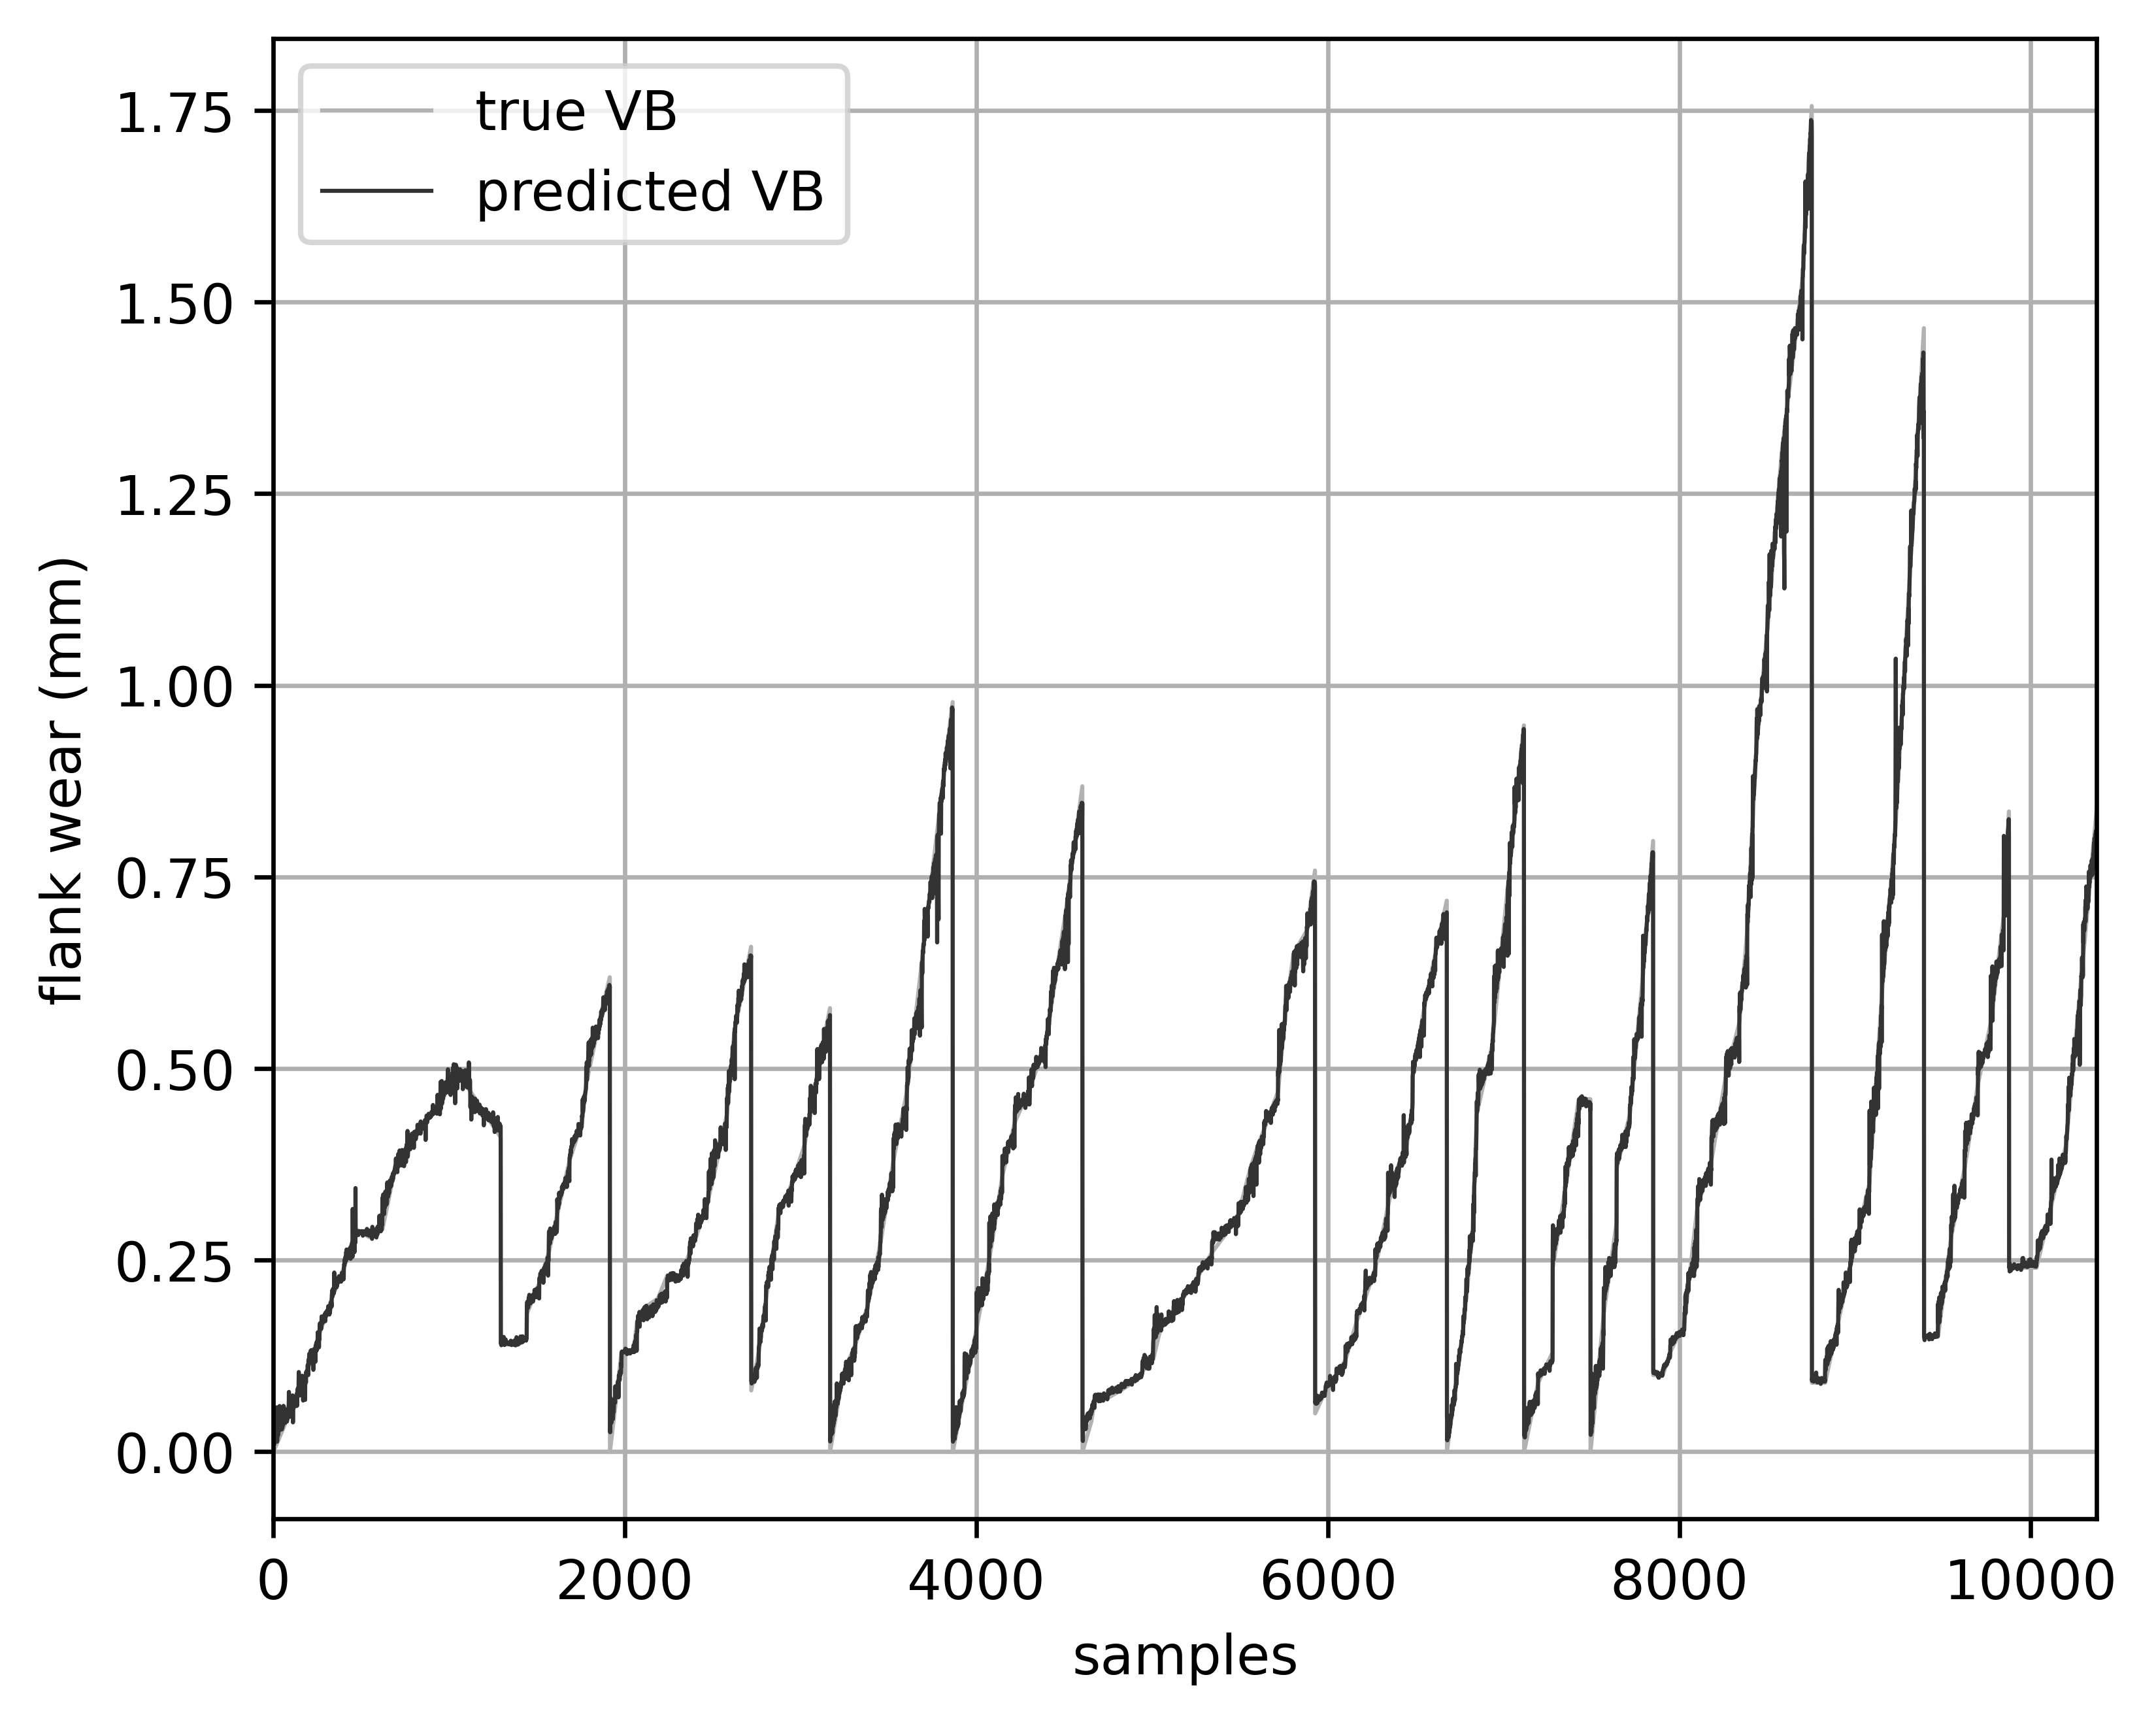

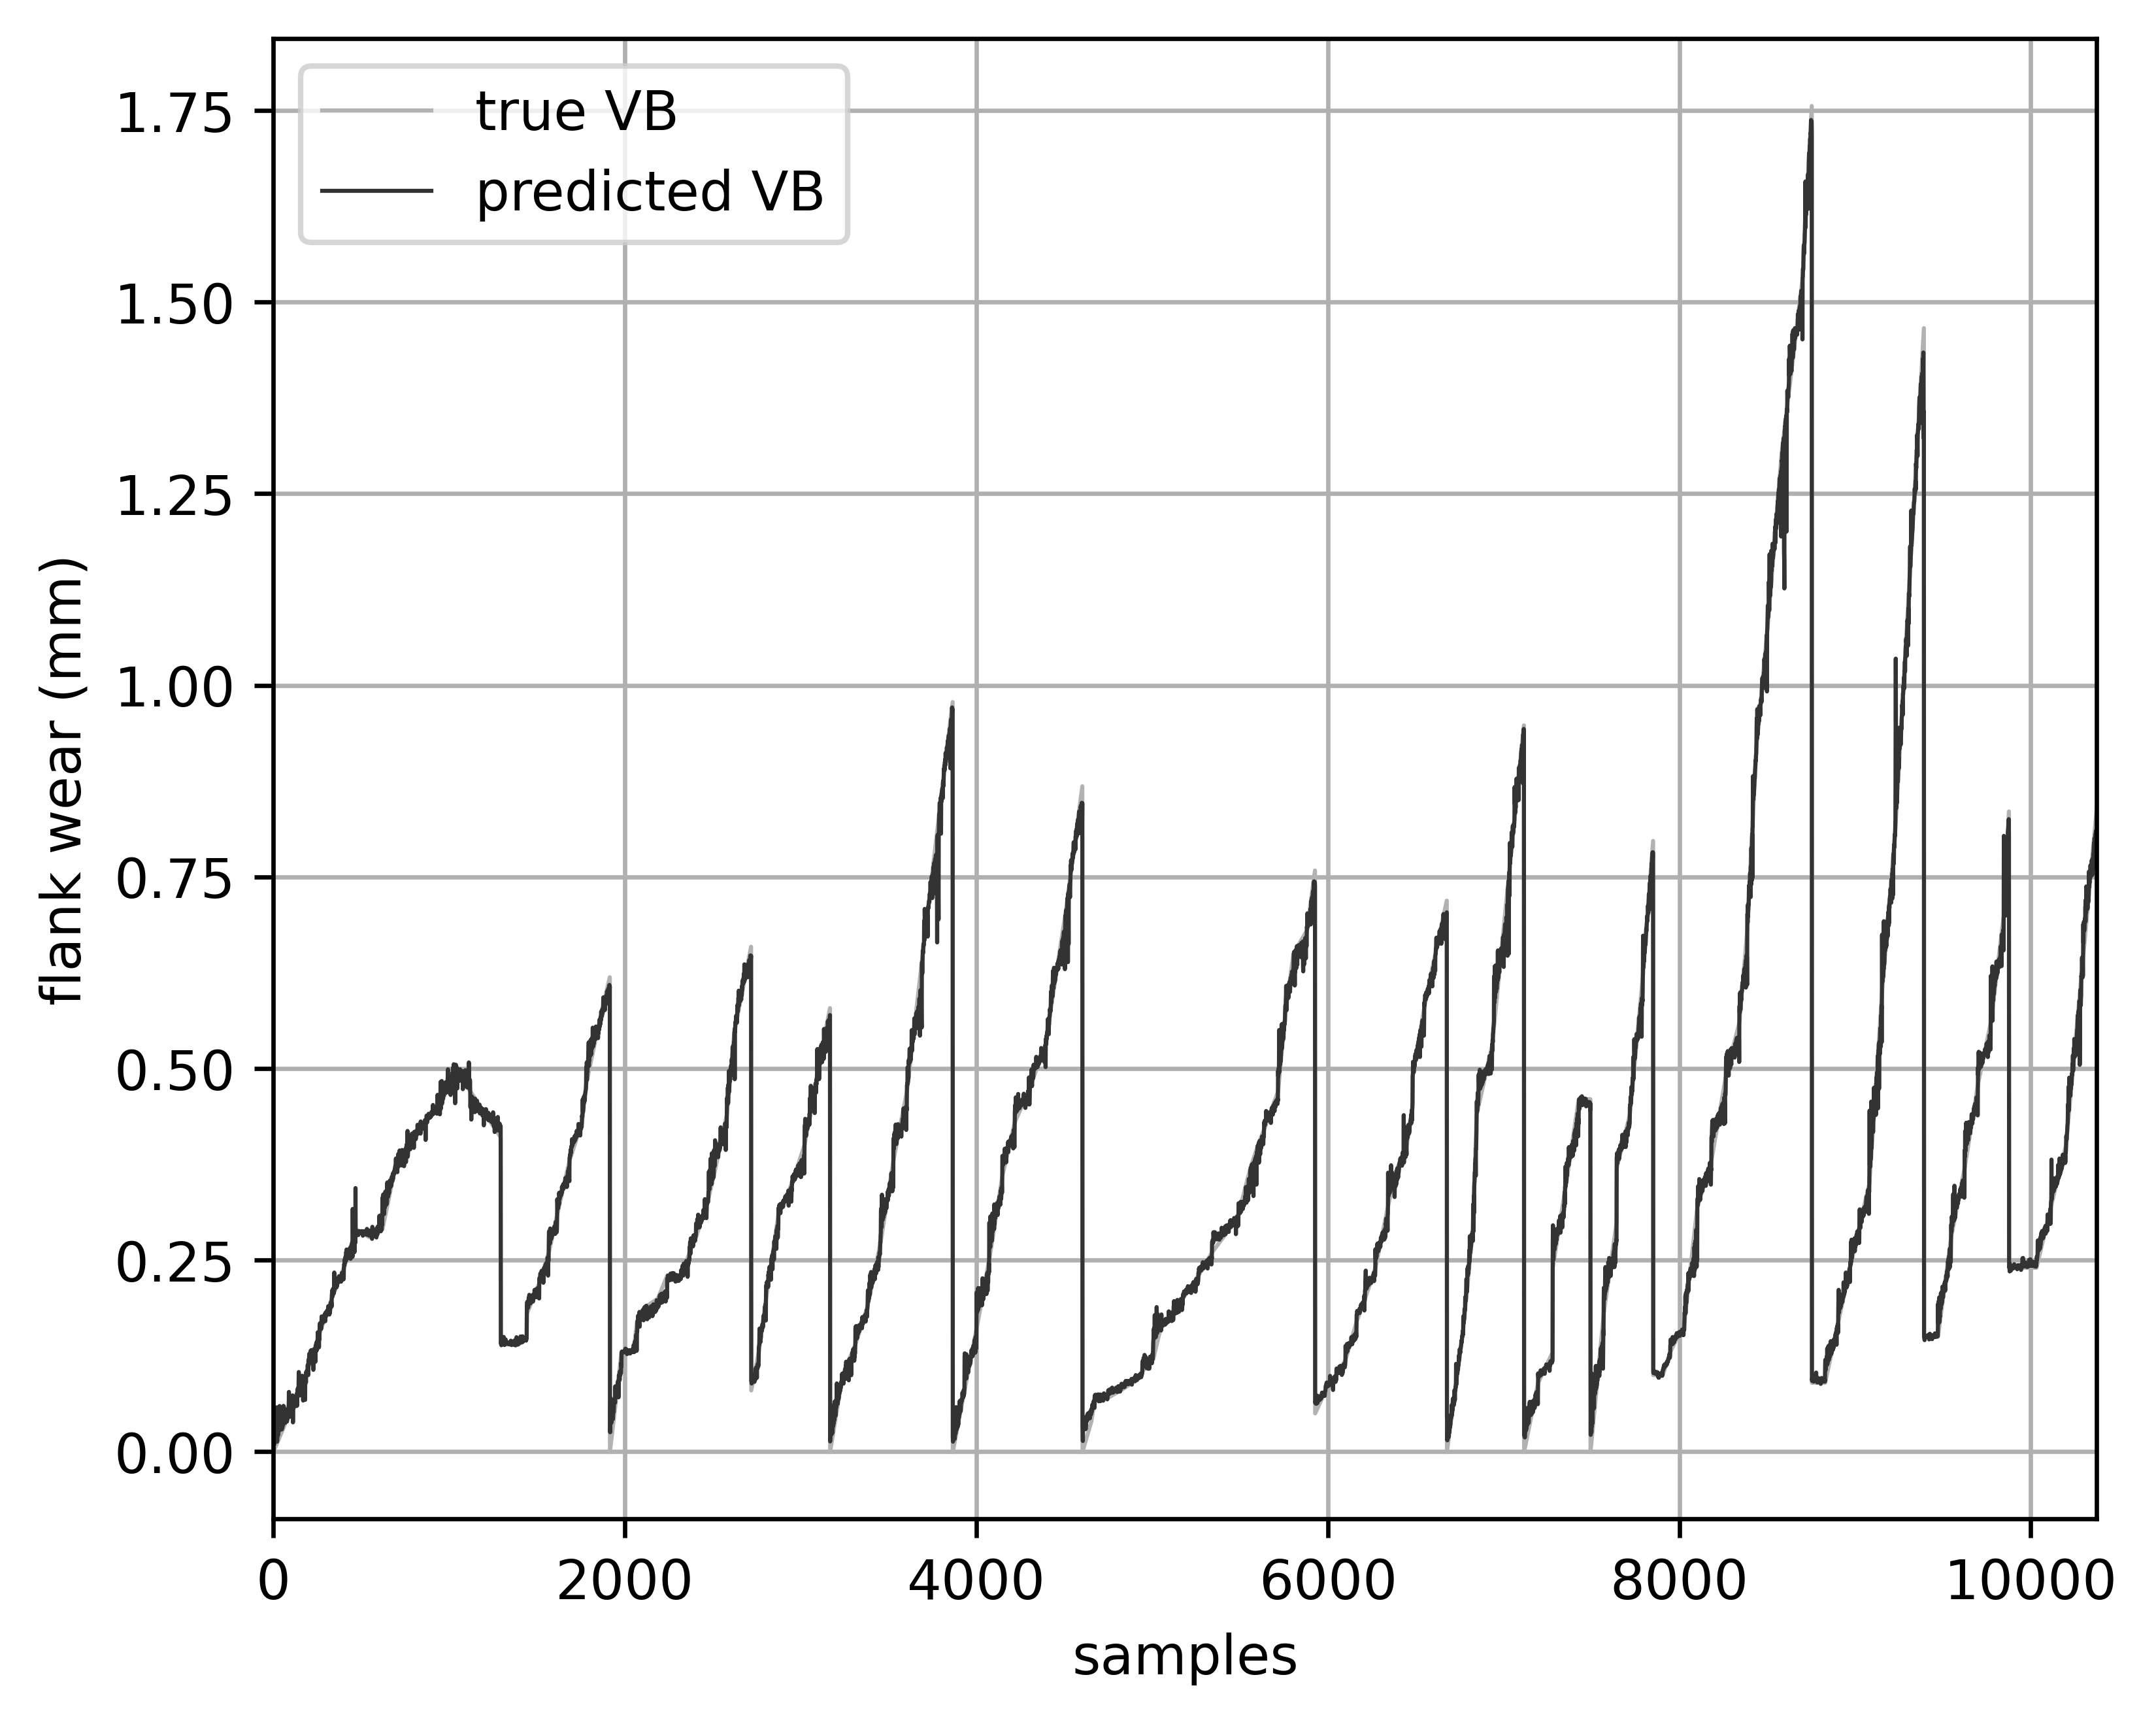

In [0]:
# plot results
plt.figure(dpi=600, figsize=(6, 5))
plt.plot(_y, label="true VB", color=(178/255, 178/255, 178/255), linewidth=0.75)
plt.plot(y_pred, label="predicted VB", color=(51/255, 51/255, 51/255), linewidth=0.75)
plt.ylabel('flank wear (mm)')
plt.xlabel('samples')
plt.xlim([0, len(y_pred)])
plt.grid()
plt.legend()
plt.show()

In [0]:
print(automl.show_models())
# TODO save the automl model

[(0.460000, SimpleRegressionPipeline({'categorical_encoding:__choice__': 'one_hot_encoding', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'extra_trees_preproc_for_regression', 'regressor:__choice__': 'adaboost', 'rescaling:__choice__': 'quantile_transformer', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False', 'preprocessor:extra_trees_preproc_for_regression:bootstrap': 'True', 'preprocessor:extra_trees_preproc_for_regression:criterion': 'friedman_mse', 'preprocessor:extra_trees_preproc_for_regression:max_depth': 'None', 'preprocessor:extra_trees_preproc_for_regression:max_features': 0.6788238819290887, 'preprocessor:extra_trees_preproc_for_regression:max_leaf_nodes': 'None', 'preprocessor:extra_trees_preproc_for_regression:min_samples_leaf': 4, 'preprocessor:extra_trees_preproc_for_regression:min_samples_split': 10, 'preprocessor:extra_trees_preproc_for_regression:min_weight_fraction_leaf': 0.0, 'preprocessor:extra_trees_preproc_for_regression:n_estimat

In [0]:
print(automl.trajectory_)

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
  categorical_encoding:__choice__, Value: 'one_hot_encoding'
  categorical_encoding:one_hot_encoding:minimum_fraction, Value: 0.01
  categorical_encoding:one_hot_encoding:use_minimum_fraction, Value: 'True'
  imputation:strategy, Value: 'mean'
  preprocessor:__choice__, Value: 'no_preprocessing'
  regressor:__choice__, Value: 'random_forest'
  regressor:random_forest:bootstrap, Value: 'True'
  regressor:random_forest:criterion, Value: 'mse'
  regressor:random_forest:max_depth, Constant: 'None'
  regressor:random_forest:max_features, Value: 1.0
  regressor:random_forest:max_leaf_nodes, Constant: 'None'
  regressor:random_forest:min_impurity_decrease, Constant: 0.0
  regressor:random_forest:min_samples_leaf, Value: 1
  regressor:random_forest:min_samples_split, Value: 2
  regressor:random_forest:min_weight_fraction_leaf, Constant: 0.0
  regressor:random_forest:n_estimators, Constant: 100
  rescaling:__choice__, Va

In [0]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: a35f7158bb4c1d8547cdcca972ddb2ea
  Metric: r2
  Best validation score: 0.988572
  Number of target algorithm runs: 249
  Number of successful target algorithm runs: 204
  Number of crashed target algorithm runs: 6
  Number of target algorithms that exceeded the time limit: 24
  Number of target algorithms that exceeded the memory limit: 15

auto-sklearn results:
  Dataset name: a35f7158bb4c1d8547cdcca972ddb2ea
  Metric: r2
  Best validation score: 0.988572
  Number of target algorithm runs: 249
  Number of successful target algorithm runs: 204
  Number of crashed target algorithm runs: 6
  Number of target algorithms that exceeded the time limit: 24
  Number of target algorithms that exceeded the memory limit: 15



In [0]:
print(automl.get_models_with_weights())

[(0.46, SimpleRegressionPipeline({'categorical_encoding:__choice__': 'one_hot_encoding', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'extra_trees_preproc_for_regression', 'regressor:__choice__': 'adaboost', 'rescaling:__choice__': 'quantile_transformer', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False', 'preprocessor:extra_trees_preproc_for_regression:bootstrap': 'True', 'preprocessor:extra_trees_preproc_for_regression:criterion': 'friedman_mse', 'preprocessor:extra_trees_preproc_for_regression:max_depth': 'None', 'preprocessor:extra_trees_preproc_for_regression:max_features': 0.6788238819290887, 'preprocessor:extra_trees_preproc_for_regression:max_leaf_nodes': 'None', 'preprocessor:extra_trees_preproc_for_regression:min_samples_leaf': 4, 'preprocessor:extra_trees_preproc_for_regression:min_samples_split': 10, 'preprocessor:extra_trees_preproc_for_regression:min_weight_fraction_leaf': 0.0, 'preprocessor:extra_trees_preproc_for_regression:n_estimators'

### **Result export**
To save the predicted flank wear, the following code can be used.

In [0]:
from google.colab import files

np.savetxt('y_pred.out', y_pred, delimiter=',')
files.download('y_pred.out')

### **Result visualization**
In case of a high degree of agreement between the predicted VB and the true VB, the figure generated here presents the differences very well. When the graph of the prediction overlaps the true measured values from the data set to a large extent, only the line of the predicted wear is visible in the previous figure.

In [0]:
# see: https://stackoverflow.com/questions/51810908/custom-fonts-in-google-colaboratory-matplotlib-charts

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='Helvetica')  # font?

res = y_pred - _y

axes = []

fig = plt.figure(dpi=600, figsize=(3.47, 4))
axes.append(plt.subplot(311))
plt.plot(_y , color='black', linewidth=1)
plt.grid()
plt.ylabel('true VB (mm)')
plt.xlim([0, len(_y)])
plt.yticks([0, 0.5, 1, 1.5])
axes.append(plt.subplot(312))
plt.plot(y_pred, color='black', linewidth=1)
plt.grid()
plt.ylabel('predicted VB (mm)')
plt.xlim([0, len(y_pred)])
plt.yticks([0, 0.5, 1, 1.5])
axes.append(plt.subplot(313))
plt.plot(res, color='black', linewidth=1)
plt.grid()
plt.ylabel('difference (mm)')
plt.xlabel('samples')
plt.xlim([0, len(res)])
plt.yticks([-0.5, -0.25, 0, 0.25, 0.5])
plt.tight_layout()
fig.align_ylabels(axes)

from google.colab import files
plt.savefig("true_pred_res.svg")
files.download("true_pred_res.svg") 

# use https://cloudconvert.com/svg-converter to convert to emf

plt.show()
